In [5]:
import tweepy 
import pandas as pd
import matplotlib.pyplot as plt
import codecs
from aylienapiclient import textapi
import csv, io, time, collections

In [24]:
import nltk
# installing word cloud
# python -m pip install wordcloud
#conda install -c https://conda.anaconda.org/conda-forge wordcloud (if the above does not work)
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [6]:
CONSUMER_KEY = 'G0qXv4Nt88oi36Sa4MjcOibJd'
CONSUMER_SECRET = 'DJgDLdn5TWGAwV3FH121eGDrXIUZXmRHFjOZWfC7j5oMdgjjMM'
ACCESS_KEY = '216270538-dhch099KZYjsJyT47ChQ93U1r8ZndZJETZNjnuwI'
ACCESS_SECRET = 'VARb6TrtizrwGqBmmq8TIYabsgThIFVRKWWtt28MkMea0'

In [7]:
auth = tweepy.auth.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = t.API(auth)

In [8]:
#search query and store your results in a variable(JSON format)
search_results = api.search(q = "#brexit", lang = "en", result_type = "recent", count = 1000)

In [9]:
file = codecs.open("Data storage/brexit.txt", "w", "utf-8")
for result in search_results:
    file.write(result.text)
    file.write("\n")
file.close()

In [10]:
#We are going to use Aylien, which has inbuilt functions to determine the tweet sentiments.
# Initialize a new client of AYLIEN Text API
client = textapi.Client("6378ba34", "e451e9d936c5b5f3a89181343e0eea1f")

In [11]:
with io.open('Data storage/brexit_tweet_SA.csv', 'w', encoding='utf8', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(["Tweet", "Sentiment"])
    with io.open("Data storage/brexit.txt", 'r', encoding='utf8') as f:
        for tweet in f.readlines():   
            # Make call to AYLIEN Text API
            sentiment = client.Sentiment({'text': tweet})
            time.sleep(1)

            ## Write the sentiment result into csv file
            csv_writer.writerow([sentiment['text'], sentiment['polarity']])


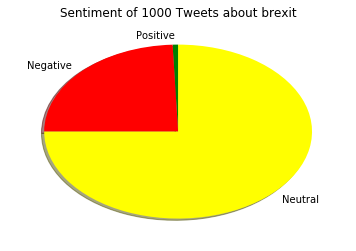

In [12]:
#open up your csv file with the sentiment results
with open('Data storage/brexit_tweet_SA.csv', 'r', encoding = 'utf8') as brexcsvfile:
        # Pandas to read the “Sentiment” column,
        df_brex = pd.read_csv(brexcsvfile)
        sent_tweet = df_brex["Sentiment"]

#use Counter to count how many times each sentiment appears and save each as a variable
        counter = collections.Counter(sent_tweet)
        positive = counter['positive']
        negative = counter['negative']
        neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'yellow']
text = "brexit"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 1000 Tweets about "+ text)
plt.show()

In [26]:
tweet_pos = df_brex[df_brex['Sentiment']=='positive']
tweet_pos = tweet_pos['Tweet']
tweet_neg = df_brex[df_brex['Sentiment']=='negative']
tweet_neg = tweet_neg['Tweet']

Positive words


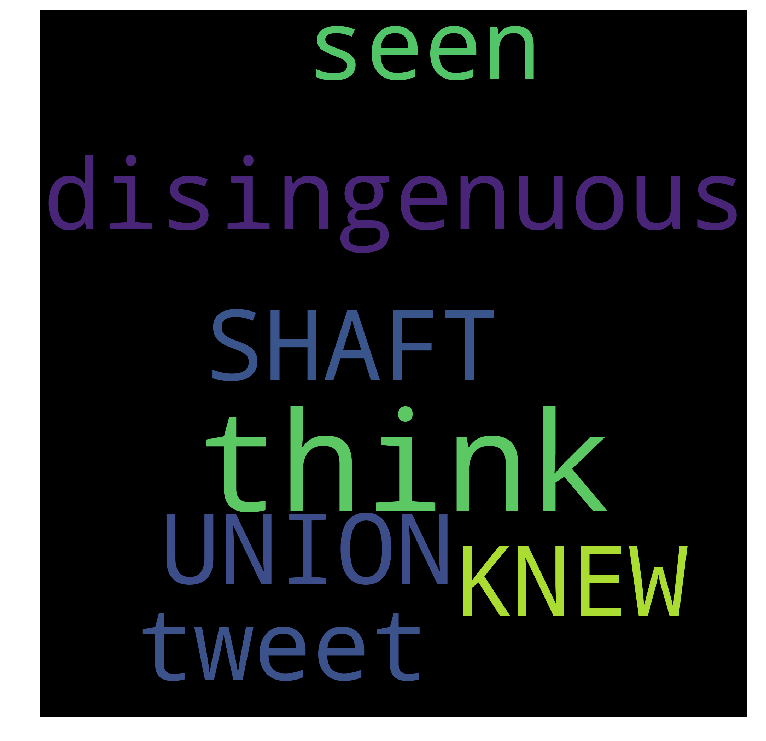

Negative words


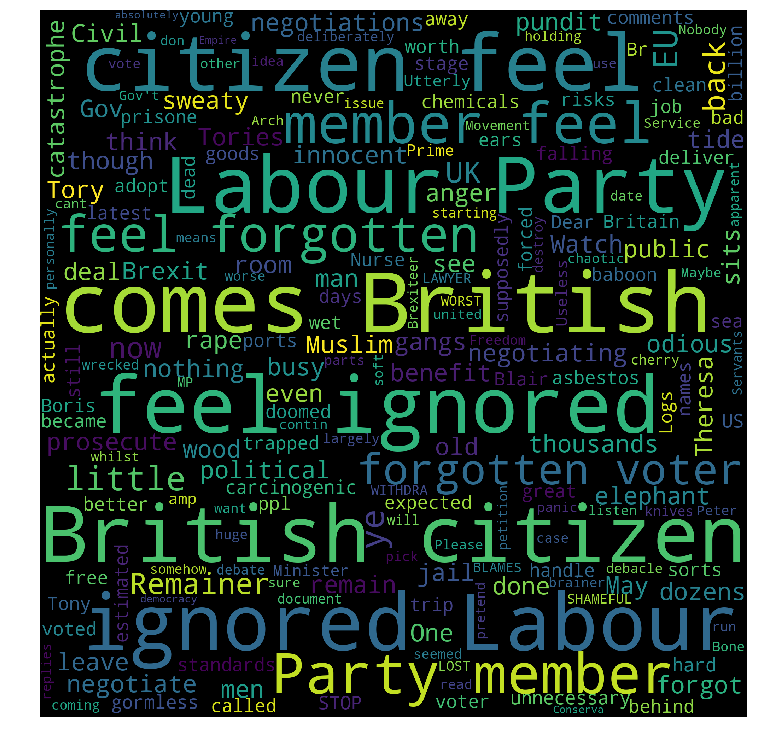

In [28]:
def wordcloud_draw(df_brex, color = 'black'):
    words = ' '.join(df_brex)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2000,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(tweet_pos)
print("Negative words")
wordcloud_draw(tweet_neg)